In [1]:
%load_ext autoreload
%autoreload 2

In [29]:
from os.path import join
import json
import h5py
import pprint
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [10]:
# set data root
data_root = "/ssd/pbagad/datasets/MAD/data/"

# load annotations
train = json.load(open(join(data_root, 'annotations/MAD_train.json'),'r'))
val   = json.load(open(join(data_root, 'annotations/MAD_val.json'),'r'))
test  = json.load(open(join(data_root, 'annotations/MAD_test.json'),'r'))

In [11]:
len(train), len(val), len(test)

(280183, 32064, 72044)

In [14]:
data = {**train, **val, **test}

In [15]:
len(data)

384291

In [18]:
data["6788"]

{'movie': '3018_CINDERELLA_MAN',
 'sentence': 'He checks his fake tooth in a mirror rubbing it with a forefinger.',
 'timestamps': [510.688, 515.25],
 'ext_timestamps': [510.688, 515.25],
 'movie_duration': 8661.6,
 'tokens': ['He',
  'checks',
  'his',
  'fake',
  'tooth',
  'in',
  'a',
  'mirror',
  'rubbing',
  'it',
  'with',
  'a',
  'forefinger',
  '.']}

### Check temporal captions

In [19]:
# define some temporal prepositions
temporal_prepositions = ["after", "before", "then", "while", "during", "as soon as"]


def check_in_caption(caption, keywords):
    """Checks if any of the given keywords occur in the caption."""
    caption = caption.lower()
    for word in keywords:
        if word.lower() in caption:
            return True
    return False

In [21]:
# find captions with temporal prepositions
temporal_captions = [data[x] for x in data if check_in_caption(data[x]["sentence"], temporal_prepositions)]

In [25]:
temporal_captions_split = defaultdict(list)

for x in temporal_captions:
    for word in temporal_prepositions:
        if word in x["sentence"]:
            temporal_captions_split[word].append(x)

In [27]:
len(temporal_captions_split["after"])

2315

array([3, 5, 1, 4, 0, 2])

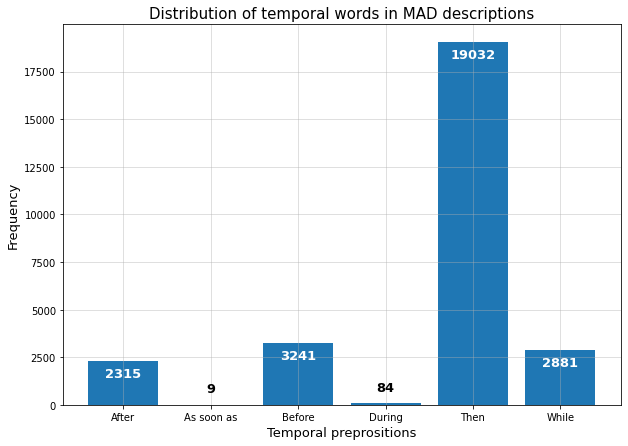

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

counts = [len(temporal_captions_split[k]) for k in temporal_captions_split]
keys = [k.capitalize() for k in temporal_captions_split]

indices = np.argsort(keys)
counts = np.array(counts)[indices]
keys = np.array(keys)[indices]

ax.grid(alpha=0.5)
ax.bar(keys, counts)
ax.set_title("Distribution of temporal words in MAD descriptions", fontsize=15)
ax.set_xlabel("Temporal preprositions", fontsize=13)
ax.set_ylabel("Frequency", fontsize=13)

rects = ax.patches
for rect, count in zip(rects, counts):
    height = rect.get_height()
    
    if count > 1000:
        new_height = height - 1000
        color="white"
    else:
        new_height = height + 500
        color="black"
    
    ax.text(
        rect.get_x() + rect.get_width() / 2, new_height,
        count, ha="center", va="bottom", fontsize=13, color=color, weight='bold',
    )

plt.show()